In [530]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [531]:
# Study data files
visitor_data_path_ont = "/Users/varunvinodh/Downloads/ont_visitor.csv"
visitor_data_path_que = "/Users/varunvinodh/Downloads/quebec_visitor.csv"
visitor_data_path_nova = "/Users/varunvinodh/Downloads/Nova_visitors.csv"
visitor_data_path_bc = "/Users/varunvinodh/Downloads/BC_visitors.csv"

#read data file
visitor_data_ont = pd.read_csv(visitor_data_path_ont)
visitor_data_que = pd.read_csv(visitor_data_path_que)
visitor_data_nova = pd.read_csv(visitor_data_path_nova)
visitor_data_bc = pd.read_csv(visitor_data_path_bc)


visitor_data1 = pd.merge(visitor_data_ont,visitor_data_que, how = "outer")
visitor_data2 = pd.merge(visitor_data_nova,visitor_data_bc, how = "outer")
visitor_data = pd.merge(visitor_data1,visitor_data2, how = "outer")
pd.options.display.float_format = '{:.0f}'.format
visitor_data.fillna(method='ffill', inplace=True)
# Remove the commas from the values column
visitor_data['Total non resident tourists'] = visitor_data['Total non resident tourists'].str.replace(',', '')
# Convert the column 'C' from object to float
visitor_data['Total non resident tourists'] = visitor_data['Total non resident tourists'].astype(float)
pd.set_option('display.max_rows', None)
visitor_data

,Geography,Reference period,Total non resident tourists
0,Ontario,NaN,NaN
1,Ontario,January 2015,323164
2,Ontario,February 2015,320417
3,Ontario,March 2015,389897
4,Ontario,April 2015,509622
5,Ontario,May 2015,751848
6,Ontario,June 2015,1037176
7,Ontario,July 2015,1362061
8,Ontario,August 2015,1221904
9,Ontario,September 2015,861919


In [532]:

# Convert the "Reference period" column to a datetime object
visitor_data['Reference period'] = pd.to_datetime(visitor_data['Reference period'], format='%B %Y')

visitor_data.head()

,Geography,Reference period,Total non resident tourists
0,Ontario,NaT,NaN
1,Ontario,2015-01-01,323164
2,Ontario,2015-02-01,320417
3,Ontario,2015-03-01,389897
4,Ontario,2015-04-01,509622


In [533]:
visitor_data['Year'] = visitor_data['Reference period'].dt.year
visitor_data['Month'] = visitor_data['Reference period'].dt.month
# Extract the quarter from the datetime object
visitor_data['Quarter'] = visitor_data['Reference period'].dt.quarter


In [534]:
new_df = visitor_data[['Geography', 'Total non resident tourists', 'Quarter']]
new_df

,Geography,Total non resident tourists,Quarter
0,Ontario,NaN,NaN
1,Ontario,323164,1
2,Ontario,320417,1
3,Ontario,389897,1
4,Ontario,509622,2
5,Ontario,751848,2
6,Ontario,1037176,2
7,Ontario,1362061,3
8,Ontario,1221904,3
9,Ontario,861919,3


In [535]:
new_df = new_df.drop(0, axis=0)
# converting "Year" values from string to integer

new_df["Quarter"] = new_df["Quarter"].astype(int)
new_df["Total non resident tourists"] = new_df["Total non resident tourists"].astype(int)
new_df

,Geography,Total non resident tourists,Quarter
1,Ontario,323164,1
2,Ontario,320417,1
3,Ontario,389897,1
4,Ontario,509622,2
5,Ontario,751848,2
6,Ontario,1037176,2
7,Ontario,1362061,3
8,Ontario,1221904,3
9,Ontario,861919,3
10,Ontario,643624,4


In [536]:
ontario_df = new_df.loc[new_df['Geography'] == 'Ontario', :]
ont_quart1_df = ontario_df.loc[ontario_df['Quarter'] == 1, :]
avg_ont1 = ont_quart1_df['Total non resident tourists'].mean()
avg_ont1

417760.13333333336

In [537]:
ontario_df = new_df.loc[new_df['Geography'] == 'Ontario', :]
ont_quart2_df = ontario_df.loc[ontario_df['Quarter'] == 2, :]
avg_ont2 = ont_quart2_df['Total non resident tourists'].mean()
avg_ont2

854557.2

In [538]:
ontario_df = new_df.loc[new_df['Geography'] == 'Ontario', :]
ont_quart3_df = ontario_df.loc[ontario_df['Quarter'] == 3, :]
avg_ont3 = ont_quart3_df['Total non resident tourists'].mean()
avg_ont3

1260337.6

In [539]:
ontario_df = new_df.loc[new_df['Geography'] == 'Ontario', :]
ont_quart4_df = ontario_df.loc[ontario_df['Quarter'] == 4, :]
avg_ont4 = ont_quart4_df['Total non resident tourists'].mean()
avg_ont4

625394.3333333334

In [540]:
quebec_df = new_df.loc[new_df['Geography'] == 'Quebec', :]
que_quart1_df = quebec_df.loc[quebec_df['Quarter'] == 1, :]
avg_que1 = que_quart1_df['Total non resident tourists'].mean()
avg_que1

151151.66666666666

In [541]:
quebec_df = new_df.loc[new_df['Geography'] == 'Quebec', :]
que_quart2_df = quebec_df.loc[quebec_df['Quarter'] == 2, :]
avg_que2 = que_quart2_df['Total non resident tourists'].mean()
avg_que2

258223.2

In [542]:
quebec_df = new_df.loc[new_df['Geography'] == 'Quebec', :]
que_quart3_df = quebec_df.loc[quebec_df['Quarter'] == 3, :]
avg_que3 = que_quart3_df['Total non resident tourists'].mean()
avg_que3

394043.86666666664

In [543]:
quebec_df = new_df.loc[new_df['Geography'] == 'Quebec', :]
que_quart4_df = quebec_df.loc[quebec_df['Quarter'] == 4, :]
avg_que4 = que_quart4_df['Total non resident tourists'].mean()
avg_que4

247347.625

In [544]:
nova_df = new_df.loc[new_df['Geography'] == 'Nova Scotia', :]
nova_quart1_df = nova_df.loc[nova_df['Quarter'] == 1, :]
avg_nova1 = nova_quart1_df['Total non resident tourists'].mean()
avg_nova1

2893.9333333333334

In [545]:
nova_df = new_df.loc[new_df['Geography'] == 'Nova Scotia', :]
nova_quart2_df = nova_df.loc[nova_df['Quarter'] == 2, :]
avg_nova2 = nova_quart2_df['Total non resident tourists'].mean()
avg_nova2

15916.333333333334

In [546]:
nova_df = new_df.loc[new_df['Geography'] == 'Nova Scotia', :]
nova_quart3_df = nova_df.loc[nova_df['Quarter'] == 3, :]
avg_nova3 = nova_quart3_df['Total non resident tourists'].mean()
avg_nova3

41554.933333333334

In [547]:
nova_df = new_df.loc[new_df['Geography'] == 'Nova Scotia', :]
nova_quart4_df = nova_df.loc[nova_df['Quarter'] == 4, :]
avg_nova4 = nova_quart4_df['Total non resident tourists'].mean()
avg_nova4

32411.25

In [548]:
bc_df = new_df.loc[183:243]
bc_quart1_df = bc_df.loc[bc_df['Quarter'] == 1, :]
avg_bc1 = bc_quart1_df['Total non resident tourists'].mean()
avg_bc1

287958.6666666667

In [549]:
bc_df = new_df.loc[183:243]
bc_quart2_df = bc_df.loc[bc_df['Quarter'] == 2, :]
avg_bc2 = bc_quart2_df['Total non resident tourists'].mean()
avg_bc2

524675.2

In [571]:
bc_df = new_df.loc[183:243]
bc_quart3_df = bc_df.loc[bc_df['Quarter'] == 3, :]
avg_bc3 = bc_quart3_df['Total non resident tourists'].mean()
avg_bc3

769115.8

In [572]:
bc_df = new_df.loc[183:243]
bc_quart4_df = bc_df.loc[bc_df['Quarter'] == 4, :]
avg_bc4 = bc_quart4_df['Total non resident tourists'].mean()
avg_bc4

303092.8125

In [573]:
data_ont = {'Average visitors in Ontario': [avg_ont1 , avg_ont2 , avg_ont3 , avg_ont4], 'Quarters': ["Jan-Feb-Mar","Apr-May-Jun","Jul-Aug-Sep","Oct-Nov-Dec"]}
index = ['Ontario','Ontario','Ontario','Ontario']

ontline = pd.DataFrame(data_ont, index=index)
ontline

,Average visitors in Ontario,Quarters
Ontario,417760,Jan-Feb-Mar
Ontario,854557,Apr-May-Jun
Ontario,1260338,Jul-Aug-Sep
Ontario,625394,Oct-Nov-Dec


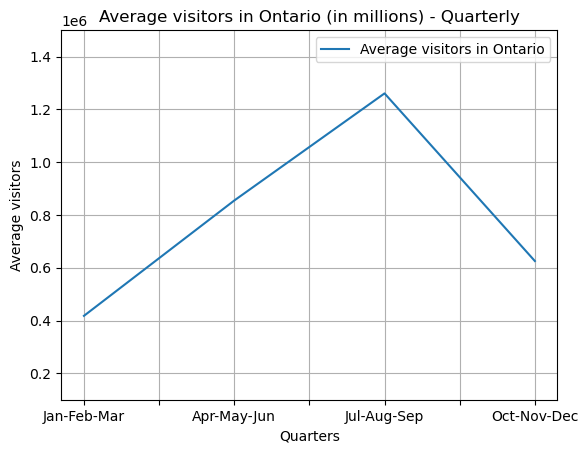

In [574]:
# Plot the line graph
ontline.plot(x='Quarters', y='Average visitors in Ontario', kind='line')
plt.title("Average visitors in Ontario (in millions) - Quarterly")
plt.ylim(100000, 1500000, 200000)
plt.ylabel("Average visitors")
plt.grid()

# Show the plot
plt.show()

In [575]:
data_quebec = {'Average visitors in Quebec': [avg_que1 , avg_que2 , avg_que3 , avg_que4], 'Quarters': ["Jan-Feb-Mar","Apr-May-Jun","Jul-Aug-Sep","Oct-Nov-Dec"]}
index = ['Quebec','Quebec','Quebec','Quebec',]

queline = pd.DataFrame(data_quebec, index=index)
queline

,Average visitors in Quebec,Quarters
Quebec,151152,Jan-Feb-Mar
Quebec,258223,Apr-May-Jun
Quebec,394044,Jul-Aug-Sep
Quebec,247348,Oct-Nov-Dec


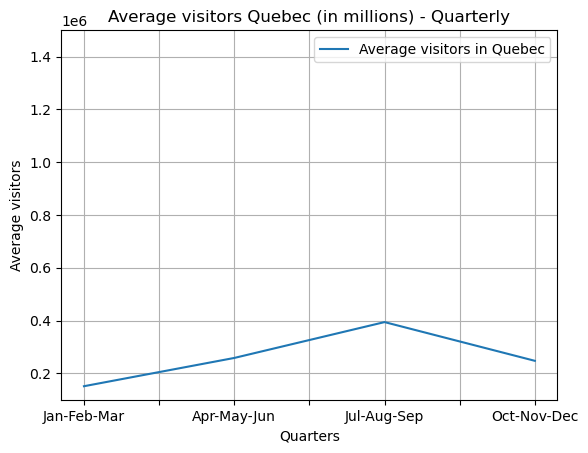

In [576]:

queline.plot(x='Quarters', y='Average visitors in Quebec', kind='line')
plt.title("Average visitors Quebec (in millions) - Quarterly")
plt.ylim(100000, 1500000, 200000)
plt.ylabel("Average visitors")
plt.grid()

# Show the plot
plt.show()

In [577]:
data_nova = {'Average visitors in nova': [avg_nova1 , avg_nova2 , avg_nova3 , avg_nova4], 'Quarters': ["Jan-Feb-Mar","Apr-May-Jun","Jul-Aug-Sep","Oct-Nov-Dec"]}
index = ['Nova Scotia','Nova Scotia','Nova Scotia','Nova Scotia',]

novaline = pd.DataFrame(data_nova, index=index)
novaline

,Average visitors in nova,Quarters
Nova Scotia,2894,Jan-Feb-Mar
Nova Scotia,15916,Apr-May-Jun
Nova Scotia,41555,Jul-Aug-Sep
Nova Scotia,32411,Oct-Nov-Dec


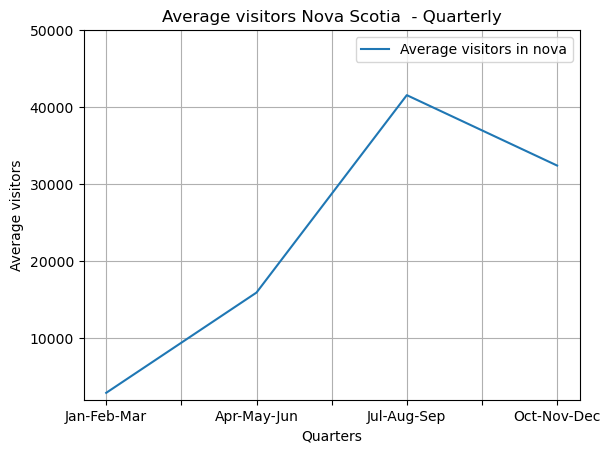

In [578]:

novaline.plot(x='Quarters', y='Average visitors in nova', kind='line')
plt.title("Average visitors Nova Scotia  - Quarterly")
plt.ylim(2000, 50000, 20000)
plt.ylabel("Average visitors")
plt.grid()

# Show the plot
plt.show()

In [579]:
data_bc = {'Average visitors in BC': [avg_bc1 , avg_bc2 , avg_bc3 , avg_bc4], 'Quarters': ["Jan-Feb-Mar","Apr-May-Jun","Jul-Aug-Sep","Oct-Nov-Dec"]}
index = ['British Columbia','British Columbia','British Columbia','British Columbia']

bcline = pd.DataFrame(data_bc, index=index)
bcline

,Average visitors in BC,Quarters
British Columbia,287959,Jan-Feb-Mar
British Columbia,524675,Apr-May-Jun
British Columbia,769116,Jul-Aug-Sep
British Columbia,303093,Oct-Nov-Dec


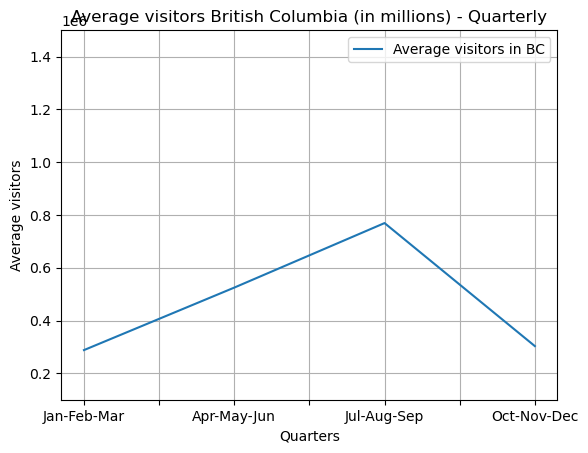

In [580]:

bcline.plot(x='Quarters', y='Average visitors in BC', kind='line')
plt.title("Average visitors British Columbia (in millions) - Quarterly")
plt.ylim(100000, 1500000, 200000)
plt.ylabel("Average visitors")
plt.grid()

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

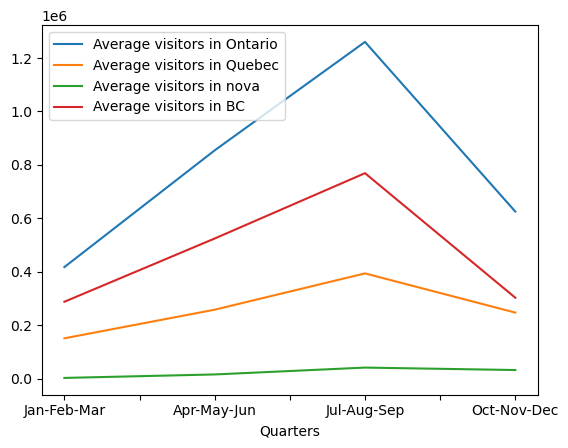

In [581]:
ontline.plot(x='Quarters', y='Average visitors in Ontario', kind='line')
queline.plot(x='Quarters', y='Average visitors in Quebec', kind='line',ax=plt.gca())
novaline.plot(x='Quarters', y='Average visitors in nova', kind='line',ax=plt.gca())
bcline.plot(x='Quarters', y='Average visitors in BC', kind='line',ax=plt.gca())
plt.show